### Implementing Linear Regression

### sklearn.linear_model.Linear_Regression

#### Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

#### Parameters: 

fit_interceptbool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

Deprecated since version 1.0: normalize was deprecated in version 1.0 and will be removed in 1.2.

copy_Xbool, default=True
If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None
The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context.

positivebool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.


In [4]:
### Implementation of OLS

### importing libraries

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1,1], [2,3], [3,4], [4, 6]])
y = np.dot(X, np.array([1,2])) + 3
reg = LinearRegression().fit(X,y)
reg.score(X,y)


1.0

In [7]:
reg.coef_

array([1., 2.])

In [8]:
reg.intercept_

2.9999999999999964

In [10]:
reg.predict(np.array([[5,6]]))

array([20.])

In [11]:
reg.get_params(deep = True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

### Implementing Ridge regression

Linear least squares with l2 regularization

Minimizes the objectives function: ||y - Xw||^2_2 + alpha * ||w||^2_2

Parameters:

alpha{float, ndarray of shape (n_targets,)}, default=1.0
Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in [0, inf).

When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Ridge object is not advised. Instead, you should use the LinearRegression object.

fit_interceptbool, default=True Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalizebool, default=False This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

Deprecated since version 1.0: normalize was deprecated in version 1.0 and will be removed in 1.2.

copy_Xbool, default=True If True, X will be copied; else, it may be overwritten.

n_jobsint, default=None The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context.

positivebool, default=False When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.



In [18]:
import numpy as np
from sklearn.linear_model import Ridge
ran = np.random.RandomState(0)

number_Of_Samples, number_Of_Features = 10, 5
y = ran.randn(number_Of_Samples)
X = ran.randn(number_Of_Samples, number_Of_Features)

clx = Ridge(alpha = 1.0).fit(X,y)


In [19]:
clx.score(X,y)

0.6836781050289735

In [20]:
Ridge()

Ridge()

In [21]:
clx.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

### Implementing Lasso Regression

Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [22]:
import numpy as np
from sklearn.linear_model import Lasso

rng = np.random.RandomState(0)
number_Of_Samples, number_of_features = 10, 5

X = rng.randn(number_Of_Samples, number_of_features)
y = rng.randn(number_Of_Samples)

clf = Lasso(alpha = 1.0).fit(X,y)

clf.coef_

array([-0.,  0.,  0., -0.,  0.])

In [23]:
clf.intercept_

-0.2427925882379088

In [24]:
print(clf.coef_)

[-0.  0.  0. -0.  0.]


### Implementing ElasticNet

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

a * ||w||_1 + 0.5 * b * ||w||_2^2
where:

alpha = a + b and l1_ratio = a / (a + b)

In [25]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features = 2, random_state = 0)

regr = ElasticNet(random_state = 0)

regr.fit(X,y)

ElasticNet(random_state=0)

In [26]:
regr.coef_

array([18.83816048, 64.55968825])

In [27]:
regr.score(X,y)

0.8904453086976037

In [28]:
regr.intercept_

1.4512607561654032

In [29]:
regr.predict(np.array([[1,2]]))

array([149.40879773])

### Implementing Logistic Regression

In [30]:
### sklearn.linear_model.LogisticRegression

Parameters:

penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:

'none': no penalty is added;

'l2': add a L2 penalty term and it is the default choice;

'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added.

l1_ratiofloat, default=None
The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'. Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X,y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X,y)

clf.predict(X[:2,:])

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

In [34]:
clf.score(X,y)

0.9733333333333334

In [35]:
clf.coef_

array([[-0.41874027,  0.96699274, -2.52102832, -1.08416599],
       [ 0.53123044, -0.31473365, -0.20002395, -0.94866082],
       [-0.11249017, -0.65225909,  2.72105226,  2.03282681]])

In [38]:
clf.predict_proba(X[:2,:])

array([[9.81802911e-01, 1.81970751e-02, 1.43580537e-08],
       [9.71729527e-01, 2.82704429e-02, 3.00353141e-08]])

### Implementing Naive Bayes

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [40]:
X,y = load_iris(return_X_y=True)
gnr = GaussianNB()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [42]:
y_pred = gnr.fit(X_train, y_train).predict(X_test)

In [43]:
print("Total number of misclassified datapoints out of %d points: %d" %(X_test.shape[0], (y_test != y_pred).sum()))

Total number of misclassified datapoints out of 45 points: 0


### Implementing K-Nearest Neighbor classifier

##### sklearn.neighbors.KNeighborsClassifier

Parameters:

n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.


weights{‘uniform’, ‘distance’} or callable, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.


algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.


leaf_sizeint, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

pint, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.


metricstr or callable, default=’minkowski’
The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. For a list of available metrics, see the documentation of DistanceMetric and the metrics listed in sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS. Note that the “cosine” metric uses cosine_distances. 


metric_paramsdict, default=None
Additional keyword arguments for the metric function.

n_jobsint, default=None
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [44]:
X = [[1], [2], [3], [4], [5], [6]]
y = [0,0,0,0,1,1]

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X,y)



KNeighborsClassifier(n_neighbors=3)

In [46]:
print(neigh.predict([[1.4]]))

[0]


In [47]:
print(neigh.predict([[3.7]]))

[0]


In [48]:
print(neigh.predict([[5.4]]))

[1]


In [52]:
### selecting an optimal k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

error_rate = []
for i in range(1,4):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

min error:- 0.0 at K value:- 0


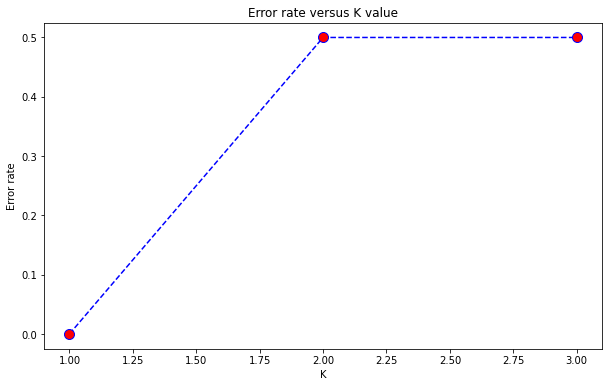

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(range(1,4),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate versus K value')
plt.xlabel('K')
plt.ylabel('Error rate')
print("min error:-", min(error_rate),"at K value:-", error_rate.index(min(error_rate)))

### Implementing KFold Crossvalidation

In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

In [57]:
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
kf=KFold(n_splits=5)

In [58]:
score=cross_val_score(logreg,X,Y,cv=kf)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [59]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


### Implementing Startified K Fold Cross validation

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Cross Validation score :0.9733333333333334


/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Implementing Monte Carlo Cross validation (shuffle split)

In [61]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [62]:
logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

In [63]:
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

In [64]:
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.97777778 0.95555556 0.97777778 0.95555556 0.91111111 0.93333333
 0.95555556 0.97777778 1.         0.97777778]
Average Cross Validation score :0.9622222222222222


### Implementing timeSeriesSplit

In [65]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [66]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

time_series = TimeSeriesSplit()
print(time_series)

for train_index, test_index in time_series.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


### Implementing SVM

##### sklearn.svm.SVC

Parameters:

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
if ‘auto’, uses 1 / n_features.

coef0float, default=0.0
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

class_weightdict or ‘balanced’, default=None
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, note that internally, one-vs-one (‘ovo’) is always used as a multi-class strategy to train models; an ovr matrix is only constructed from the ovo matrix. The parameter is ignored for binary classification.





In [68]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [69]:
X = np.array([[1,2], [2,3], [-1,2], [-2,-3]])
y = np.array([1,1,2,2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X,y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [70]:
print(clf.predict([[-0.8,1]]))

[2]


In [73]:
print(clf.predict([[0.8,2]]))

[1]


In [74]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [78]:
print(regr.predict([[0.3,0.4, 0.6, 1, 2.3]]))

[1.30303987]


### Implementing Decision Tree

##### sklearn.tree.DecisionTreeClassifier

Parameters:
    
criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leafint or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

max_leaf_nodesint, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decreasefloat, default=0.0
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

class_weightdict, list of dict or “balanced”, default=None
Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

For multi-output, the weights of each column of y will be multiplied.

ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data,iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

### Total impurity of leaves vs effective alphas of pruned tree

In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [81]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

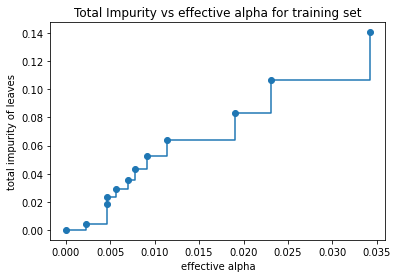

In [83]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [84]:
##train a decision tree using the effective alphas. 
##The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, 
##clfs[-1], with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("number of nodes in the last tree is: {} with ccp_alpha: {} ".format(clfs[-1].tree_.node_count,ccp_alphas[-1])
     )


number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777 


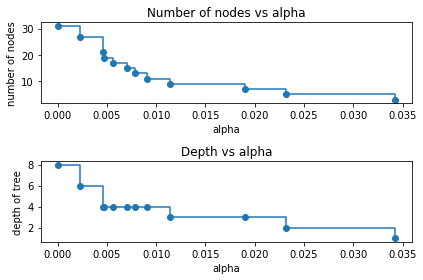

In [85]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

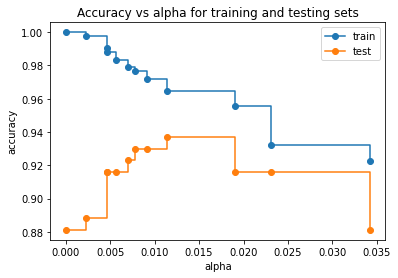

In [86]:
### Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

##### sklearn.tree.DecisionTreeRegressor

Parameters:
    
criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.

In [91]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

X,y = load_boston(return_X_y=True)
rgr = DecisionTreeRegressor(random_state=0)
cross_val_score(rgr,X,y,cv=10 )

array([ 0.48141081,  0.60461936, -1.32633384,  0.54154398,  0.75705408,
        0.33934083,  0.18757206,  0.40679147, -1.9602183 , -0.32967889])

### Ensemble ML techniques

#### Bagging

##### sklearn.ensemble.BaggingClassifier

Parameters:
    
base_estimatorobject, default=None
The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.

n_estimatorsint, default=10
The number of base estimators in the ensemble.

max_samplesint or float, default=1.0
The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).

If int, then draw max_samples samples.

If float, then draw max_samples * X.shape[0] samples.

max_featuresint or float, default=1.0
The number of features to draw from X to train each base estimator ( without replacement by default, see bootstrap_features for more details).

If int, then draw max_features features.

If float, then draw max_features * X.shape[1] features.

bootstrapbool, default=True
Whether samples are drawn with replacement. If False, sampling without replacement is performed.

bootstrap_featuresbool, default=False
Whether features are drawn with replacement.

oob_scorebool, default=False
Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.

In [92]:
### Bagging implementation
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier

In [93]:
X,y = make_classification(n_samples = 100, n_features=4, n_informative=2, n_redundant=0, shuffle=False, random_state=0)

In [94]:
clf= BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X,y)

In [95]:
clf.predict([[0.2,0.3,0.4,0.8]])

array([1])

#### Random Forest Implementation

##### sklearn.ensemble.RandomForestClassifier

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [98]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X,y = make_classification(n_samples = 100, n_features=4, n_informative=2, 
                          n_redundant=0, shuffle=False, random_state=0)

clf = RandomForestClassifier(n_estimators=10,max_depth=2, random_state=0).fit(X,y)
clf.predict([[0.2,0.3,0.4,0.8]])

array([1])

##### sklearn.ensemble.RandomForestRegressor

class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                      random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0).fit(X, y)


In [100]:
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


### Implementing Boosting techniques

#### AdaBoost: sklearn.ensemble.AdaBoostClassifier

Parameters:

base_estimatorobject, default=None
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

n_estimatorsint, default=50
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).

learning_ratefloat, default=1.0
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range (0.0, inf).

algorithm{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’
If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

random_stateint, RandomState instance or None, default=None
Controls the random seed given at each base_estimator at each boosting iteration. Thus, it is only used when base_estimator exposes a random_state. Pass an int for reproducible output across multiple function calls. 

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X, y)

In [102]:
clf.predict([[0, 0, 0, 0]])

array([1])

In [103]:
clf.score(X, y)

0.983

#### Gradient Boost: sklearn.ensemble.GradientBoostingClassifier
class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

Parameters:

loss{‘log_loss’, ‘deviance’, ‘exponential’}, default=’log_loss’
The loss function to be optimized. ‘log_loss’ refers to binomial and multinomial deviance, the same as used in logistic regression. It is a good choice for classification with probabilistic outputs. For loss ‘exponential’, gradient boosting recovers the AdaBoost algorithm.

learning_ratefloat, default=0.1
Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range (0.0, inf).

n_estimatorsint, default=100
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf).

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

In [105]:
X,y = make_hastie_10_2(random_state=0)

In [106]:
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [107]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=2, random_state=0).fit(X_train, y_train)

In [108]:
clf.score(X_test,y_test)

0.9121

#### XgBoost

In [109]:
###XGBRegressor code:
    
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error')
(-scores)**0.5

array([56.04057166, 56.14039793, 60.3213523 , 59.67532995, 60.7722925 ])

In [110]:
###XGBClassifier code:

url = 'https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter02/heart_disease.csv'
import pandas as pd
df = pd.read_csv(url)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(), X, y)

array([0.85245902, 0.85245902, 0.7704918 , 0.78333333, 0.76666667])

### Hyperparameter Tuning

In [111]:
### Exhaustive GridSearch

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99      

In [112]:
###SuccessiveHalving
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd

param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
X, y = make_classification(n_samples=1000, random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                          max_resources=30).fit(X, y)
sh.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=24, random_state=0)

### Unsupervised ML Techniques

#### K -Means clustering - sklearn.cluster.KMeans

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

Parameters:
    
n_clustersint, default=8
The number of clusters to form as well as the number of centroids to generate.

init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
Method for initialization:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

n_initint, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iterint, default=300
Maximum number of iterations of the k-means algorithm for a single run.

tolfloat, default=1e-4
Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

verboseint, default=0
Verbosity mode.

random_stateint, RandomState instance or None, default=None
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See Glossary.

In [113]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1,2], [2,3], [4,5], [2,3], [5,6], [6,7]])
km= KMeans(n_clusters = 2, random_state=0).fit(X)


In [114]:
km.labels_

array([1, 1, 0, 1, 0, 0], dtype=int32)

In [115]:
km.predict([[2,4]])

array([1], dtype=int32)

In [116]:
km.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [117]:
km.cluster_centers_

array([[5.        , 6.        ],
       [1.66666667, 2.66666667]])

### Implementing MiniBatchKMeans

In [118]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
            [4, 2], [4, 0], [4, 4],
          [4, 5], [0, 1], [2, 2],
          [3, 2], [5, 5], [1, -1]])

kmeans = MiniBatchKMeans(n_clusters=2,
                        random_state=0,
                     batch_size=6)
kmeans = kmeans.partial_fit(X[0:6,:])
kmeans = kmeans.partial_fit(X[6:12,:])
kmeans.cluster_centers_

array([[2. , 1. ],
       [3.5, 4.5]])

In [119]:
kmeans.predict([[0, 0], [4, 4]])

array([0, 1], dtype=int32)

In [120]:
kmeans = MiniBatchKMeans(n_clusters=2,
...                          random_state=0,
...                          batch_size=6,
...                          max_iter=10).fit(X)

In [121]:
kmeans.cluster_centers_

array([[3.95918367, 2.40816327],
       [1.12195122, 1.3902439 ]])

In [122]:
kmeans.predict([[0, 0], [4, 4]])

array([1, 0], dtype=int32)

### Implementing DBSCAN clustering (Density based Spatial Clustering of Applications with Noise)

In [124]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [132]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

num_samples = 1000
cluster_centers = [(3,3),(7,8)]
num_classes = len(cluster_centers)
epsilon = 3
min_samples =15

X,y = make_blobs(n_samples = num_samples, centers=cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)

labels = db.labels_

In [133]:
labels

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [127]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [128]:
no_noise

0

In [129]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 0


In [134]:
X,y

(array([[7.08172777, 8.43011004],
        [7.733447  , 7.68815484],
        [2.97279617, 3.3990294 ],
        ...,
        [2.60072694, 3.041907  ],
        [7.91963647, 7.52966489],
        [3.16269871, 3.26567977]]),
 array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 

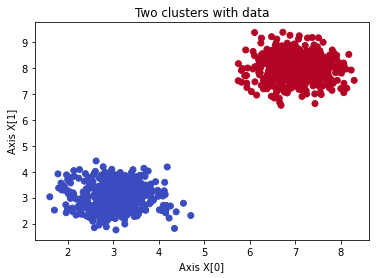

In [135]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

### Calculating silhouette coefficient: sklearn.metrics.silhouette_score

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Implementing Neural Networks

#### Multi-layer Perceptron

In [138]:
### MLP Classifier

from sklearn.neural_network import MLPClassifier

X = [[0.,0.],[1.,1.]]
y = [0,1]

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X,y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [139]:
clf.predict([[1.0,2.0], [-1.,-2.]])

array([1, 0])

In [140]:
clf.coefs_

[array([[-0.14196276, -0.02104562, -0.85522848, -3.51355396, -0.60434709],
        [-0.69744683, -0.9347486 , -0.26422217, -3.35199017,  0.06640954]]),
 array([[ 0.29164405, -0.14147894],
        [ 2.39665167, -0.6152434 ],
        [-0.51650256,  0.51452834],
        [ 4.0186541 , -0.31920293],
        [ 0.32903482,  0.64394475]]),
 array([[-4.53025854],
        [-0.86285329]])]

In [142]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [143]:
clf.predict_proba([[1.0,2.0], [-1.,-2.]])

array([[1.96718015e-004, 9.99803282e-001],
       [1.00000000e+000, 4.67017947e-144]])

#### MLP Regressor

Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

Both MLPRegressor and MLPClassifier use parameter alpha for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes. Following plot displays varying decision function with value of alpha.

### CNN

In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

predicted_classes = fashion_model.predict(test_X)

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

### Implementing PCA

the PCA analysis consists of the following steps:

First, the original input variables stored in X are z-scored such each original variable (column of X) has zero mean and unit standard deviation.

The next step involves the construction and eigendecomposition of the covariance matrix Cx= (1/n)X'X(in case of z-scored data the covariance is equal to the correlation matrix since the standard deviation of all features is 1).

Eigenvalues are then sorted in a decreasing order representing decreasing variance in the data (the eigenvalues are equal to the variance — I will prove this below using Python in Paragraph 6).

Finally, the projection (transformation) of the original normalized data onto the reduced PCA space is obtained by multiplying (dot product) the originally normalized data by the leading eigenvectors of the covariance matrix i.e. the PCs.

The new reduced PCA space maximizes the variance of the original data. To visualize the projected data as well as the contribution of the original variables, in a joint plot, we can use the biplot.


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

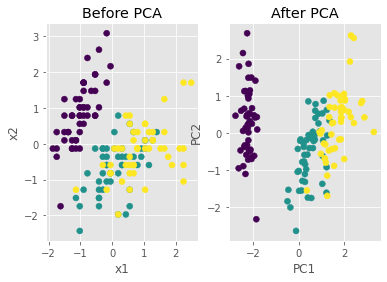

In [145]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [146]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [147]:
### Creating a sequence for LSTM

In [ ]:
Creating a sequence for LSTM implementation from our dataset
def gen_sequences(input_array, label_array=None, seq_len=3):
    seq = []
    labels = []
    for k in range(len(input_array)):
        if k < seq_len:
            n_zeros = seq_len-k-1
            # Since we're generating sequnces we need to pad the first seq_len-1 values to ensure we don't lose any values
            b = np.zeros((n_zeros, *input_array.shape[1:]))
            a = np.array(input_array[:k+1])
            b = np.concatenate((a, b), axis=0)
        else:
            b = np.array(input_array[k-seq_len:k])
        seq.append(b)
        
    if label_array is not None:
        assert(len(seq) == len(label_array))
    
    return np.array(seq), label_array

In [153]:
def stringMap(string1, string2):
    #check if the two strings are of equal length
    if len(string1) != len(string2):
        return False
    
    char_map = dict()
    for char1, char2 in zip(string1, string2):
        if char1 not in char_map:
            char_map[char1] = char2
        elif char_map[char1] != char2:
            return False
        
    for char1, char2 in zip(string2, string1):
        if char1 not in char_map:
            char_map[char1] = char2
        elif char_map[char1] != char2:
            return False
        
    return True

In [155]:
string1 = 'qwe'
string2 = 'asds'
print(stringMap(string1, string2))

False


### Encoding categorical features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
obj_df["make_code"] = ord_enc.fit_transform(obj_df[["make"]])
obj_df[["make", "make_code"]].head(11)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["body_style"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

In [ ]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

### Basic Python Programs

In [156]:
###Find the average of n numbers

n = int(input("Enter the number of elements to be averaged:"))
a = []
for i in range(0,n):
    elem=int(input("Enter the element:"))
    a.append(elem)
    avg = sum(a)/n

print("average of {} elements is: {}".format(n,round(avg,2)))

Enter the number of elements to be averaged:5
Enter the element:12
Enter the element:23
Enter the element:34
Enter the element:45
Enter the element:56
average of 5 elements is: 34.0


In [158]:
###Program to reverse a number in python

n = int(input("enter the number to be reversed:"))
reverse = 0
while(n > 0):
    digit = n%10
    reverse = reverse*10 + digit
    n = n//10
print("the reverse of the number is: {}".format(reverse))

enter the number to be reversed:12345
the reverse of the number is: 54321


In [159]:
### Program to find the sum of the digits

n = int(input("enter the number:"))
sum = 0
while(n > 0):
    digit = n%10
    sum = sum + digit
    n = n //10
print("the sum of the digits is: {}".format(sum))

enter the number:12345
the sum of the digits is: 15


In [162]:
### Program to check if the given number is a palindrome or not

n = int(input("enter the number:"))
temp = n
reverse = 0
while(temp > 0):
    digit = temp%10
    reverse = reverse*10 + digit
    temp = temp//10
if(n == reverse):
    print("the number is a palindrome")
else:
    print("the number is not a palindrome")

enter the number:12345
the number is not a palindrome


In [165]:
### Python Program to Count the Number of Digits in a Number

count = 0
n = int(input("enter the number:"))
while(n > 0):
    count = count + 1
    n = n//10
print("the number of digits is: {}".format(count))

enter the number:12345
the number of digits is: 5


In [166]:
### Python Program to Print Table of a Given Number

n = int(input("enter the number:"))
for i in range (1,11):
    print(n,"X",i,"=",n*i)

enter the number:7
7 X 1 = 7
7 X 2 = 14
7 X 3 = 21
7 X 4 = 28
7 X 5 = 35
7 X 6 = 42
7 X 7 = 49
7 X 8 = 56
7 X 9 = 63
7 X 10 = 70


In [168]:
### Python Program to Check if a Number is a Prime Number

n = int(input("enter the number:"))
k=0
for i in range (2, n//2 +1):
    if(n%i == 0):
        k = k + 1
if(k <= 0):
    print("the number is prime")
else:
    print("the number is not prime")
    

enter the number:7
the number is prime


In [172]:
### Python Program to Check if a Number is an Armstrong Number

n=int(input("Enter any number: "))
temp = n
add_sum = 0
while(temp!=0):
    k = temp%10
    add_sum +=k*k*k
    temp = temp//10
if(add_sum==n):
    print('Armstrong Number')
else:
    print('Not a Armstrong Number')

Enter any number: 371
Armstrong Number


In [175]:
### Python Program to Check if a Number is a Perfect Number
import math
n=int(input("Enter any number: "))
if(math.floor(math.sqrt(n)==math.ceil(math.sqrt(n)))):
    print("the number is a perfect square")
else:
    print("the number is not a perfect square")


Enter any number: 4
the number is a perfect square


In [176]:
### Python Program to Check if a Number is a Strong Number

n=int(input("Enter any number: "))
sum = 0
temp = n
while(n):
    i = 1
    f = 1
    r = n%10
    
    while(i<=r):
        f =f*i
        i = i+1
    
    sum = sum + f
    n = n//10
    
if(sum == temp):
    print("the given number is a strong number")
    
else:
    print("the given number is not a strong number")
        


Enter any number: 145
the given number is a strong number


In [179]:
### Program to Find the Second Largest Number in a List

a =[]
n=int(input("Enter number of elements:"))
for i in range(1,n+1):
    b=int(input("Enter element:"))
    a.append(b)
    a.sort()
print("second largest element is: {}".format(a[n-2]))

Enter number of elements:4
Enter element:23
Enter element:32
Enter element:45
Enter element:11
second largest element is: 32


In [1]:
### Python Program to Swap the First and Last Value of a List

a = []
n=int(input("Enter number of elements:"))
for x in range(0,n):
    b=int(input("Enter " + str(x+1) + " element:"))
    a.append(b)
temp = a[0]
a[0] = a[n-1]
a[n-1] = temp
print("the new list is:")
print(a)

Enter number of elements:4
Enter 1 element:23
Enter 2 element:12
Enter 3 element:24
Enter 4 element:32
the new list is:
[32, 12, 24, 23]


In [3]:
string = input("enter the string to be checked: ")
if(string == string[::-1]):
    print("it is a palindrome")
else:
    print("it is not a palindrome")

enter the string to be checked: ada
it is a palindrome


In [4]:
### Python Program to Count the Number of Vowels in a String

string = input("enter the string to be checked: ")
vowels = 0
for i in string:
    if(i=='a' or i=='e' or i=='i' or i=='o' or i=='u' or i=='A' or i=='E' or i=='I' or i=='O' or i=='U'):
        vowels=vowels+1
print("the number of vowels is: {}".format(vowels))


enter the string to be checked: Iloveapples
the number of vowels is: 5


In [5]:
### Python Program to Check Common Letters in Two Input Strings
string1 = input("enter the string1 to be checked: ")
string2 = input("enter the string2 to be checked: ")
a = list(set(string1)&set(string2))
print("The common letters are:")
for i in a:
    print(i)

enter the string1 to be checked: apple
enter the string2 to be checked: orange
The common letters are:
e
a


In [6]:
lst = [102, 203, 334, 0, 300]
count = 0
for i in lst:
    if(i == 0):
        count = count + 1
    while(i > 0):
        digit = i%10
        if(digit==0):
            count = count + 1
        i = i//10
print("the number of zeros is {}".format(count))
                
        
    
        

the number of zeros is 5
